Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

Reading the Data Set

In [2]:
data = pd.read_csv(r"C:\Users\rahul\Downloads\adult 3.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Classifying the types in Workclass

In [4]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Classifying the types in Education

In [5]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [6]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Classifying the types in Occupation

In [7]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Replacing the "?" with Others for clarification

In [8]:
data.occupation.replace({'?':'Others'},inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_26596\2426378524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [9]:
data.workclass.replace({'?':'none'},inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_26596\3333042976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'none'},inplace=True)


Removing the Unnecessary data items

In [10]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data = data[data['education'] != 'Preschool']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']

Dropping the duplicate column education

In [11]:
data.drop(columns = ['education'],inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Convertion of categorical Variable to Numerical Values

In [13]:
data['workclass'] = encoder.fit_transform(data['workclass'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['gender'] = encoder.fit_transform(data['gender'])
data['native-country'] = encoder.fit_transform(data['native-country'])

In [14]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,2,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,6,103497,10,4,8,3,4,0,0,0,30,39,<=50K


Splitting of dataset to x,y

In [15]:
x = data.drop(columns = 'income')
y = data['income']

Transform the numerical values to decimal values (0, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = encoder.fit_transform(y)

Traning the Dataset

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Creation of the Model using Gradient Boosting

In [18]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [19]:
predict = model.predict(x_test)
predict = np.round(predict)
accuracy_score(y_test,predict)

0.8622199062011464

Graph for the Predicted Salary Vs Actual Salary

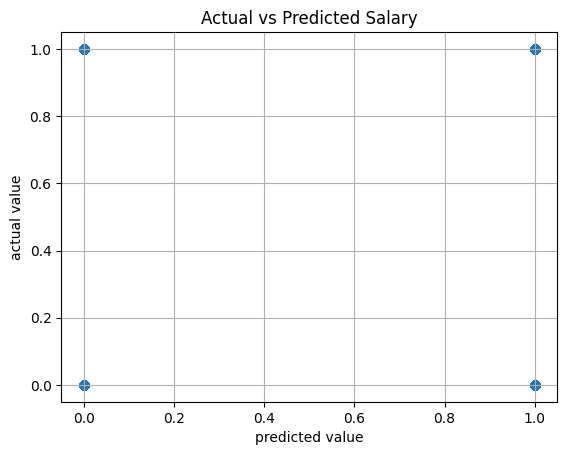

In [20]:
plt.scatter(predict,y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()

In [21]:
pred = np.array([])
for i in predict:
    if i == 0:
        pred = np.append(pred,'<=50K')
    else:
        pred = np.append(pred,'>50k')
pred

array(['>50k', '<=50K', '<=50K', ..., '>50k', '<=50K', '<=50K'],
      shape=(9595,), dtype='<U32')

In [22]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Suppose you used these categorical columns
categorical_cols = ['workclass','marital-status','occupation','relationship','race','gender','native-country']

# Create and save individual LabelEncoders for each column (don't reuse a single encoder)
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# If you encoded the target too:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)   # if you used a label encoder for y

# Fit scaler and model (you already have these)
# scaler = MinMaxScaler().fit(X)  # if you haven't saved yet
# model = trained GradientBoostingRegressor

# Save everything:
joblib.dump(encoders, 'encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model.pkl')
joblib.dump(y_encoder, 'y_encoder.pkl')  # optional, if you created one


['y_encoder.pkl']